<a href="https://colab.research.google.com/github/StevenMena/07MIAR_RedesNeu_DeepLearning/blob/main/Copy_of_Proyecto_David.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###<center><b>07MIAR29 - Redes Neuronales y Deep Learning</b></center>

<center>Proyecto de programación "Deep Vision in classification tasks"</center>

<center>Integrantes:<center>

 - Anthony Playmith Sanchez
 - Steven Mena Chavez
 - David Pozo Spin

 <center>

# <b>Estrategia 1:</b> Entrenar desde cero o <i>from scratch</i>
##1.   Cargar del dataset



In [ ]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=2f36db2fbb63f3012a6d778a05bc3d96b1324133858c9ec8c458af992f83601f
  Stored in directory: /root/.cache/pip/wheels/f3/16/ff/34e7d368370d4fd68bb749a59f1d2639ed66f3c14358e340a1
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.13
    Uninstalling kaggle-1.5.13:
      Successfully uninstalled kaggle-1.5.13


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
#drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json) from google.colab import files
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"stevomena","key":"8f87fa677f985ac32778024f8430ff9c"}'}

In [4]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## - Cargando los datos

In [5]:
!kaggle datasets download -d gpiosenka/100-bird-species 

100% 1.95G/1.96G [00:17<00:00, 137MB/s]
100% 1.96G/1.96G [00:17<00:00, 120MB/s]


In [6]:
!unzip 100-bird-species.zip -d my_dataset

Streaming output truncated to the last 5000 lines.
  inflating: my_dataset/train/WHITE TAILED TROPIC/120.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/121.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/122.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/123.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/124.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/125.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/126.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/127.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/128.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/129.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/130.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/131.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/132.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/133.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/134.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC

In [ ]:
import pandas as pd
BASE_FOLDER = "my_dataset"
df=pd.read_csv(r".\train.csv")

In [15]:
import pandas as pd

BASE_FOLDER = "my_dataset"

df=pd.read_csv(BASE_FOLDER+"/birds.csv")
print(df.shape)
display(df.sample(10))

train_df=df[df['data set']=='train']
test_df=df[df['data set']=='test']
valid_df=df[df['data set']=='valid']

print(train_df.shape)
print(test_df.shape)
print(valid_df.shape)







(89885, 5)


class id                               filepaths  \
63370     396.0     train/RED BILLED TROPICBIRD/200.jpg   
26617     168.0          train/CRESTED FIREBACK/001.jpg   
55914     352.0           train/NORTHERN GANNET/053.jpg   
75209     469.0                 train/TEAL DUCK/122.jpg   
44372     280.0                   train/HOATZIN/041.jpg   
22065     139.0  train/CHINESE BAMBOO PARTRIDGE/064.jpg   
17647     111.0                train/BUFFLEHEAD/107.jpg   
32619     205.0         train/ELLIOTS  PHEASANT/068.jpg   
42546     268.0             train/GURNEYS PITTA/162.jpg   
54369     342.0          train/MIKADO  PHEASANT/087.jpg   

                         labels data set         scientific name  
63370     RED BILLED TROPICBIRD    train       PHAETHON AETHEREU  
26617          CRESTED FIREBACK    train          LOPHURA IGNITA  
55914           NORTHERN GANNET    train          MORUS BASSANUS  
75209                 TEAL DUCK    train             ANAS CRECCA  
44372                   HOATZIN    train    OPHISTHOCOMUS HOAZIN  
22065  CHINESE BAMBOO PARTRIDGE    train  BAMBUSICOLA THORACICUS  
17647                BUFFLEHEAD    train       BUCEPHALA ALBEOLA  
32619         ELLIOTS  PHEASANT    train      SYRMATICUS ELLIOTI  
42546             GURNEYS PITTA    train       HYDRORNIS GURNEYI  
54369          MIKADO  PHEASANT    train       SYRMATICUS MIKADO

(84635, 5)
(2625, 5)
(2625, 5)


##2.   Inspección del conjunto de datos


Found 84635 images belonging to 525 classes.
Exiten: 525 clases
Exiten: 84635 elementos de entrenamiento


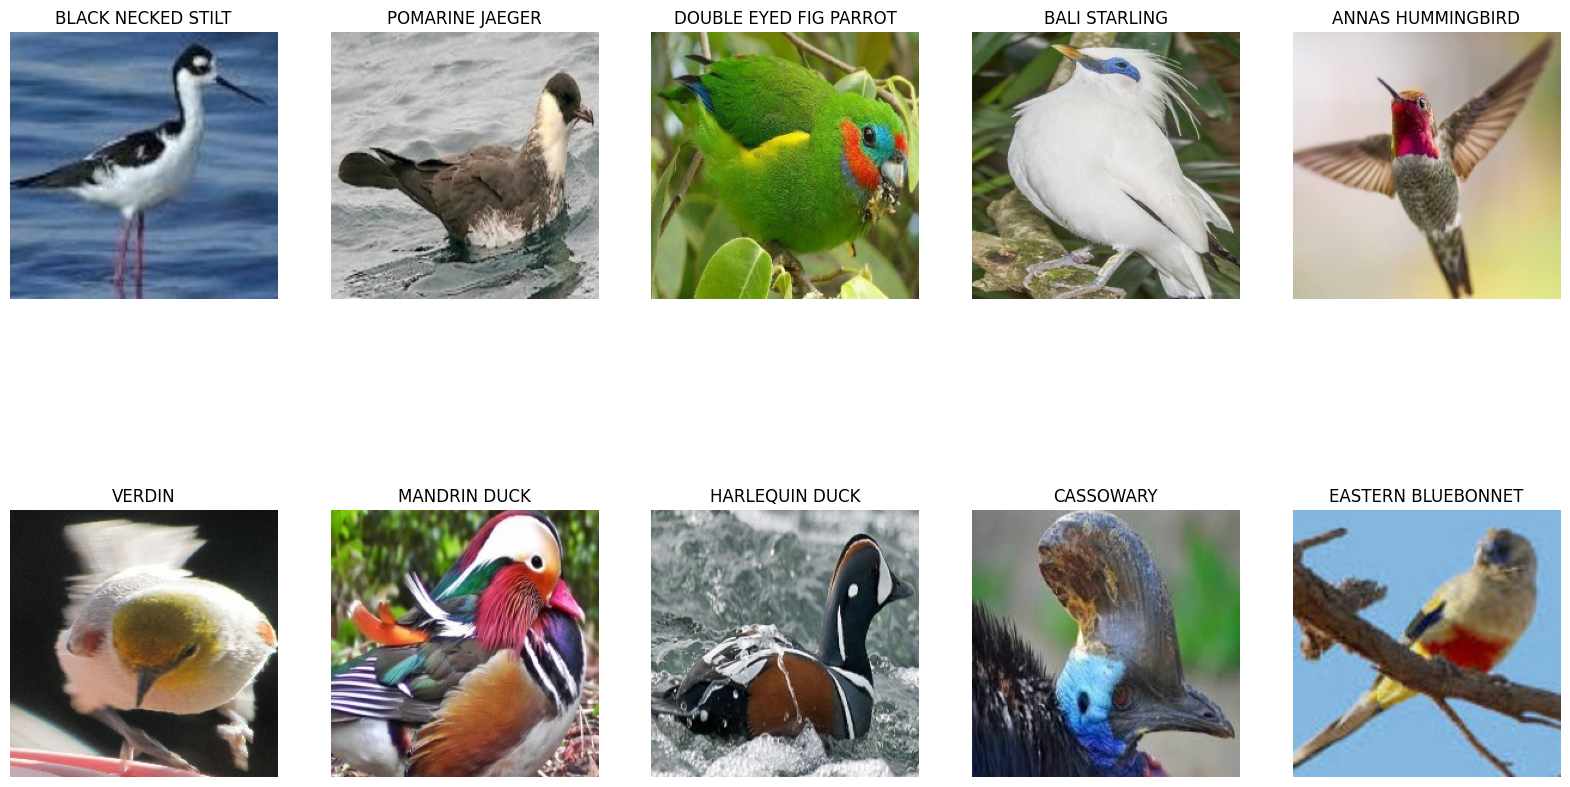

In [ ]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#se usará el imageData generator para posteriormente poder acceder a las imagenes de manera sencilla mediante directorios "flow_from_directory"
#debido a que es solo para inspección y no para hacer data augmentation, no se modifica ningún parámetro
#se leen los archivos de imagen desde la carpeta train que nos ha facilitado la base de datos descargada y se obtienen las rutas y los labels (0-524) de las imágenes
data_generator = ImageDataGenerator()  
train_images = data_generator.flow_from_dataframe(BASE_FOLDER+'/train') 
train_files = train_images.filepaths
train_labels = train_images.classes

class_name = list(train_images.class_indices.keys()) # se obtiene los nombres de cada una de las clases
print("Existen: {0} clases".format(len(class_name)))  # corroboramos la cantidad de clases 525 

print(train_files.shape)
print(train_labels.shape)
#print(x_test.shape)
#print(y_test.shape)

length_images = len(train_labels)
print("Existen: {0} elementos de entrenamiento".format(length_images))  # corroboramos la cantidad de fotos de entrenamiento
sample_size = min(length_images, 10) #se escoge mostrar un número menor o igual a 10 imágenes
sample_images = random.sample(range(length_images), sample_size)

for i in range(sample_size):
    plt.rcParams['figure.figsize'] = (20, 30)
    img = plt.imread(train_files[sample_images[i]])
    plt.subplot(5, 5, i+1)
    plt.title(class_name[train_labels[sample_images[i]]]) # se obtiene el nombre de la clase asociada a cada label aleatorio escogido
    plt.imshow(img)
    plt.axis('off')
plt.show()

##3.   Acondicionamiento del conjunto de datos

- Realizaremos un escalamiento  de las imágenes (0-1) 
- Se realiza un redimensionamiento de las imágenes a 150x150x3
- Debido a que le dataset ya nos entrega agrupemientos de datos de train, test y valid no es necesario realizar un proceso de HoldOut (partición interna de entrenamiento y validación)
- Se utilizarán lotes de 1024 imágenes para el poder realizar el entrenamiento de la red neuronal. 
- Se utilizarán lotes de 64 imágenes para validación
- Los lotes se escogieron debido a la cantidad de datos correspondiente
- Para todo esto usaremos un Generator de Imágenes 
- En primera instancia no usaemos (Data Augmentation) para ver como se comporta la red que entrenaremos, en caso de existir overfitting se realizar'a una nueva prueba con data augmentation.

In [ ]:
IMG_WIDTH = 150 # 720 original
IMG_HEIGHT = 150 # 1280 original
BATCH_SIZE_TRAIN = 1024 
BATCH_SIZE_VALID=64
DIRECTORY_TRAIN = BASE_FOLDER+'/train/'
DIRECTORY_VALID = BASE_FOLDER+'/valid/'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(directory=DIRECTORY_TRAIN,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE_TRAIN,
                                                    class_mode='categorical')
                                                    #subset='training')
validation_generator = datagen.flow_from_directory(directory=DIRECTORY_VALID,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE_VALID,
                                                    class_mode='categorical')
                                                    #subset='validation')


Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [ ]:
# se revisa que contiene cada batch del train generator, en este caso el último batch generado
for data_batch, labels_batch in train_generator:
  print('data batch shape:',data_batch.shape)
  print('labels batch shape:',labels_batch.shape)
  break

data batch shape: (1024, 150, 150, 3)
labels batch shape: (1024, 525)


## 4. Desarrollo de la arquitectura de red neuronal y entrenamiento de la red

Se ha utilizado una herramienta que permite ver de manera gráfica la arquitectura propuesta: 
https://alexlenail.me/NN-SVG/LeNet.html?fbclid=IwAR3N2UExDPu9GKYsCv_t-oYAP0NFxXz3Cwxi0e6__UtBuWPbS27Ebypg4sM

In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32960,activation='relu'))
model.add(layers.Dense(525,activation='softmax'))

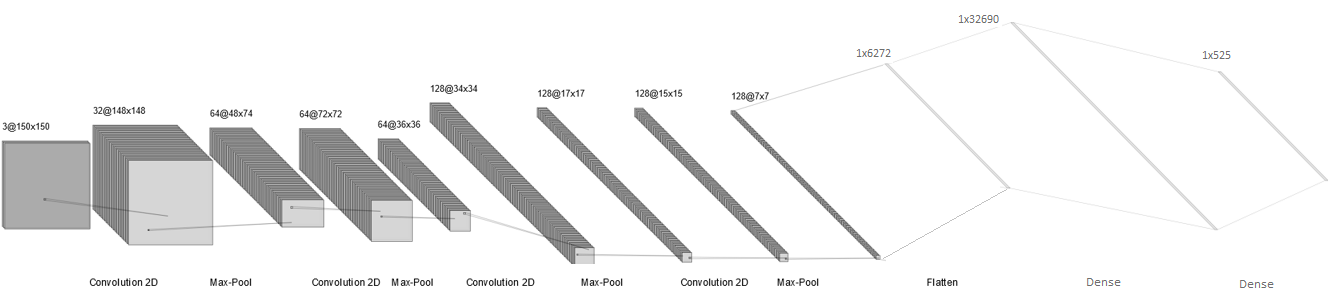

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers
# https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_directory/
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n//train_generator.batch_size, 
    epochs = 40,
    validation_data = validation_generator, 
    validation_steps = validation_generator.n//validation_generator.batch_size
)

Epoch 1/40
82/82 [==============================] - 241s 3s/step - loss: 6.2275 - acc: 0.0041 - val_loss: 6.0808 - val_acc: 0.0122
Epoch 2/40
82/82 [==============================] - 207s 3s/step - loss: 5.7634 - acc: 0.0228 - val_loss: 5.3953 - val_acc: 0.0530
Epoch 3/40
82/82 [==============================] - 195s 2s/step - loss: 5.2404 - acc: 0.0594 - val_loss: 4.9319 - val_acc: 0.0873
Epoch 4/40
82/82 [==============================] - 193s 2s/step - loss: 4.7933 - acc: 0.1110 - val_loss: 4.5733 - val_acc: 0.1376
Epoch 5/40
82/82 [==============================] - 198s 2s/step - loss: 4.3545 - acc: 0.1671 - val_loss: 3.9882 - val_acc: 0.2233
Epoch 6/40
82/82 [==============================] - 191s 2s/step - loss: 3.9705 - acc: 0.2236 - val_loss: 3.6803 - val_acc: 0.2588
Epoch 7/40
82/82 [==============================] - 191s 2s/step - loss: 3.6172 - acc: 0.2798 - val_loss: 3.4543 - val_acc: 0.2961
Epoch 8/40
82/82 [==============================] - 190s 2s/step - loss: 3.3097 - a

In [ ]:
# Almacenar el historial de entrenamiento para futuros gráficos y análisis
np.save('/content/gdrive/MyDrive/descargas_kaggle/history_1.npy',history.history)

In [ ]:
# Almacenar el modelo generado para futuro uso
model.save('/content/gdrive/MyDrive/descargas_kaggle/Birds_Monitoring_1.h5')

##5.   Monitorización del proceso de entrenamiento para la toma de decisiones

In [ ]:
# Leer el archivo  de historial de entrenamiento.
# el archivo de historial no es mas que un diccionario con valores que se pueden leer
import numpy as np
history=np.load('/content/gdrive/MyDrive/descargas_kaggle/history_1.npy',allow_pickle='TRUE').item()

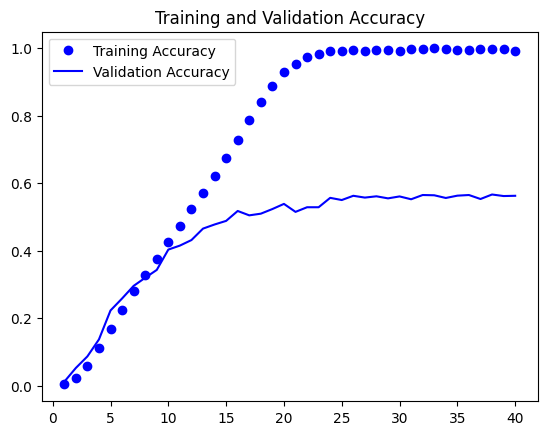

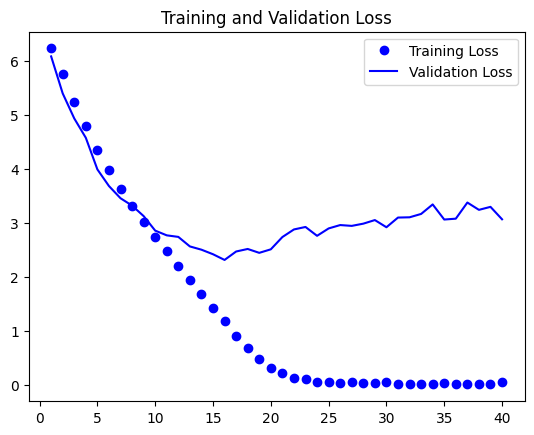

In [ ]:
import matplotlib.pyplot as plt

acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.rcParams['figure.figsize'] = (20, 30)
plt.show()

**Como se puede apreciar existe un over-fiting en el modelamiento.**

##6.   Evaluación del modelo predictivo y planteamiento de la siguiente prueba experimental

- Como se puede observar en los gráficos de pérdidas y exactitud, el modelo se encuentra sobreajustado.
- Evaluaremos el comportamiento del modelo más afondo, con los datos de test.

Más información en: https://keras.io/api/models/model_training_apis/

Más información en: https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
from keras import models
# leemos el modelo alamacenado
model= models.load_model('/content/gdrive/MyDrive/descargas_kaggle/Birds_Monitoring_1.h5')

In [ ]:
# evaluamos y observamos el comportamiento de todos los datos de test 
# predichos por el modelo generado
DIRECTORY_TEST = BASE_FOLDER+'/test/'
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(directory=DIRECTORY_TEST,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=1,
                                                    class_mode='categorical',
                                                    shuffle=False)

test_labels = test_generator.classes
test_class_name = list(test_generator.class_indices.keys()) # se obtiene los nombres de cada una de las clases

Found 2625 images belonging to 525 classes.


In [ ]:
# Evaluamos de manera general el loss y el acuracy en la data de test
score=model.evaluate(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2625/2625 [==============================] - 21s 8ms/step - loss: 2.6821 - acc: 0.5981
Test loss: 2.682103157043457
Test accuracy: 0.5980952382087708


In [ ]:
test_generator.reset()   # es necesario siempre hacer un reset antes del predict
pred = model.predict(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)  
#print(test_labels)
#print(pred.argmax(axis=1))
print(test_labels[test_labels==pred.argmax(axis=1)])
print(np.array(test_class_name)[test_labels[test_labels==pred.argmax(axis=1)]])
print(classification_report(test_labels, pred.argmax(axis=1),target_names=test_class_name,zero_division=1))


2625/2625 [==============================] - 17s 6ms/step
[  0   1   1 ... 523 524 524]
['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABBOTTS BOOBY' ...
 'YELLOW HEADED BLACKBIRD' 'ZEBRA DOVE' 'ZEBRA DOVE']
                               precision    recall  f1-score   support

              ABBOTTS BABBLER       0.50      0.20      0.29         5
                ABBOTTS BOOBY       0.50      0.40      0.44         5
   ABYSSINIAN GROUND HORNBILL       0.33      0.40      0.36         5
        AFRICAN CROWNED CRANE       1.00      0.20      0.33         5
       AFRICAN EMERALD CUCKOO       1.00      0.80      0.89         5
            AFRICAN FIREFINCH       0.75      0.60      0.67         5
       AFRICAN OYSTER CATCHER       1.00      0.60      0.75         5
        AFRICAN PIED HORNBILL       0.50      0.40      0.44         5
          AFRICAN PYGMY GOOSE       1.00      0.80      0.89         5
                    ALBATROSS       0.67      0.40      0.50         5
               ALBERT

In [ ]:
import os
contenido = os.listdir('my_dataset/test')
contenido.sort()
files = contenido[:]

Found 2625 images belonging to 525 classes.
1/1 [==============================] - 0s 240ms/step


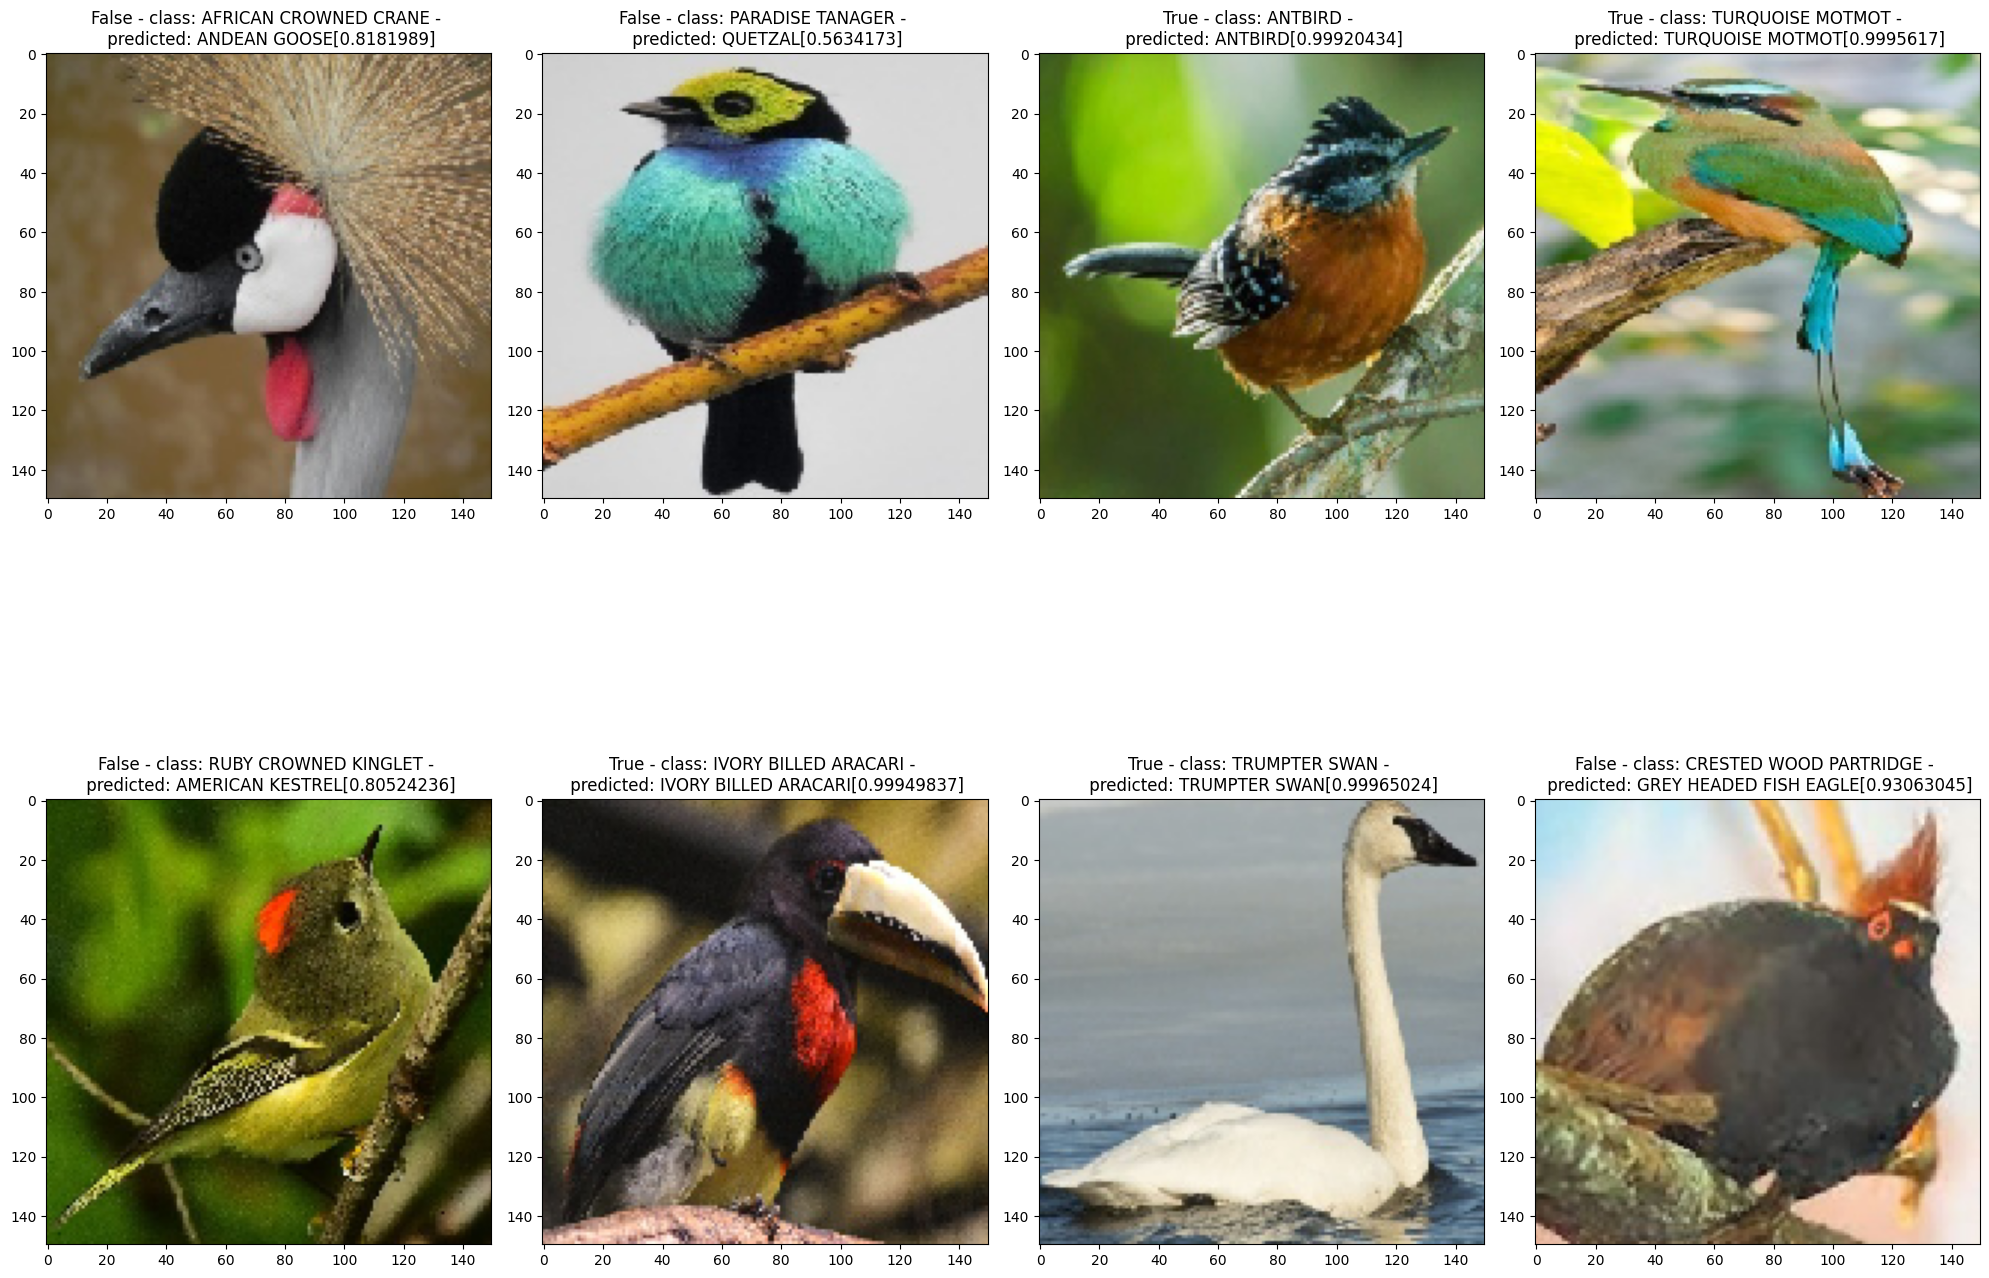

In [ ]:
# tomamos un batch de la data de test para observar de manera gráfica
# los elementos de prueba vs los elementos predichos por el modelo


Batch_test=8
test_generator = datagen.flow_from_directory(directory=DIRECTORY_TEST,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=Batch_test,
                                                    class_mode='categorical',
                                                    shuffle=True)
test_class_name = list(test_generator.class_indices.keys()) # se obtiene los nombres de cada una de las clases
def predict_one(model):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k] # 525 valores de predicción
      the_pred = np.argmax(pred) # se busca el ín dice de la predicción con el valor más alto
      predicted = files[the_pred]
      val_pred = max(pred) #se tiene el valor más alto de la predicción
      the_class = np.argmax(classes_batch[k])
      value = files[np.argmax(classes_batch[k])]
      plt.rcParams['figure.figsize'] = (20, 30)
      plt.subplot(4, 4, k+1)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + '\n predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)
      plt.tight_layout()
predict_one(model)  


##7.   Re-acondicionamiento del conjunto de datos

- Luego de visualizar en nuestro primer modelo Over-fitting, usaremos varias técnicas para reducirlo. 

- Para evitar el sobreajuste se usará como técnica principal el **data augmentation** para los datos de entrada.



información de argumentos en Image generator: https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [ ]:
DIRECTORY_TEST = BASE_FOLDER+'/test/'
BATCH_SIZE_TRAIN = 512  # para esta nueva arquitectura se disminuye el batch, para mayor batch se necesita un GPU con mayor memoria RAM
                        # size debido a que hay problemas de memoria con el batch de 1024
BATCH_SIZE_VALID=64

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_2 = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest')


train_generator = datagen_2.flow_from_directory(directory=DIRECTORY_TRAIN,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE_TRAIN,
                                                    class_mode='categorical')
                                      
validation_generator = datagen_2.flow_from_directory(directory=DIRECTORY_VALID,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE_VALID,
                                                    class_mode='categorical')
test_generator = datagen_2.flow_from_directory(directory=DIRECTORY_TEST,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=1,
                                                    class_mode='categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


##8.   Desarrollo de la nueva arquitectura de red neuronal y entrenamiento de la solución
Para reducir el over-fitting detectado, además de Data augmentation, se trabajará sobre la arquitectura de red.

- Para evitar sobreajuste en la arquitectura del modelo se utilizará **regularización L1, L2  y drop out.**

- Por otra parte, se detectó que a determinadas épocas ya no existía una mejora sustancial en las pérdidas de validación, razón por la cual para ahorrar tiempo y además obetener el mejor modelo antes de que pueda producirse overfiting se procederá a usar técnica de **early stop**.

- Se realizará un **early stop** con **val_loss** sebido a que el probelma más crítico que se tiene al momento es el overfitting, ya que el training si llega a valores de pérdidas cercanos a cero y una exactitud cercana a 0.99




In [ ]:
from keras import regularizers
from keras import layers
from keras import optimizers
from keras import models

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))

model_2.add(layers.MaxPooling2D((2,2)))
model_2.add(layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.015, l2=0.015)))
model_2.add(layers.MaxPooling2D((2,2)))
model_2.add(layers.Conv2D(128,(3,3),activation='relu'))
model_2.add(layers.MaxPooling2D((2,2)))
model_2.add(layers.Conv2D(128,(3,3),activation='relu'))
model_2.add(layers.MaxPooling2D((2,2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(32960,activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(525,activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# generamos los requisitos de early stop
# Ya que el overfiting es uno de los principales inconveninetes vamos 
# a monitorizar este parámetro.
# Se configurará para que el entrenamiento se detenga y se recopilen los
# mejores valores cuando las pérdidas con los datos validación sean los mínimos

from keras import callbacks
callback=callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0, # se desea conocer en qué momento se produce el callback
    mode="auto",
    baseline=None,
    restore_best_weights=True, # se tomarán en cuenta los mejores valores obtenidos con el mínimo val_loss
    start_from_epoch=0,
)


In [ ]:
# Debido al tiempo de entrenamiento y posibles interrupciones, se procede a crear un callback de 
# almacenado de checkpoints de entrenamiento
# más información: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb#scrollTo=IFPuhwntH8VH
# https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6
# https://keras.io/api/callbacks/
import os
checkpoint_path = "/content/gdrive/MyDrive/descargas_kaggle/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [ ]:
history_2 = model_2.fit(
    train_generator,
    steps_per_epoch = train_generator.n//train_generator.batch_size, 
    epochs = 20,
    validation_data = validation_generator, 
    validation_steps = validation_generator.n//validation_generator.batch_size,
    callbacks=[callback,cp_callback])

Epoch 1/20
165/165 [==============================] - ETA: 0s - loss: 3.0528 - acc: 0.4617
Epoch 1: saving model to /content/gdrive/MyDrive/descargas_kaggle/checkpoints/cp.ckpt
165/165 [==============================] - 720s 4s/step - loss: 3.0528 - acc: 0.4617 - val_loss: 2.7164 - val_acc: 0.5389
Epoch 2/20
165/165 [==============================] - ETA: 0s - loss: 2.9975 - acc: 0.4653
Epoch 2: saving model to /content/gdrive/MyDrive/descargas_kaggle/checkpoints/cp.ckpt
165/165 [==============================] - 729s 4s/step - loss: 2.9975 - acc: 0.4653 - val_loss: 2.8163 - val_acc: 0.5156
Epoch 3/20
165/165 [==============================] - ETA: 0s - loss: 2.9658 - acc: 0.4651
Epoch 3: saving model to /content/gdrive/MyDrive/descargas_kaggle/checkpoints/cp.ckpt
165/165 [==============================] - 745s 5s/step - loss: 2.9658 - acc: 0.4651 - val_loss: 2.7692 - val_acc: 0.5255
Epoch 4/20
165/165 [==============================] - ETA: 0s - loss: 2.9165 - acc: 0.4735
Epoch 4: sav

**OJO: en el caso de haberse detenido el entrenmiento**

Se puede seguir el entrenamiento desde el último checkpoint almacenado:
Siga el siguiente procedimiento

In [ ]:
# buscamos el último chekpoint almacenado
import tensorflow as tf
os.listdir(checkpoint_dir)
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [ ]:
# Luego se debe volver a crear  el model_2 
# Luego compilar el model_2
# luego se deben cargar los pesos entrenados previamente al modelo
model_2.load_weights(latest)

# si se desea seguir entrenado a partir de ese punto, se debe ejecutar nuevamente
# model_2.fit

**Si el entrenamiento fue exitoso, entonces es momento de guardar el modelo y el historial**

In [ ]:
# Almacenar el historial de entrenamiento para futuros gráficos y análisis
import numpy as np
np.save('/content/gdrive/MyDrive/descargas_kaggle/history_2.npy',history_2.history)

In [ ]:
# Almacenar el modelo generado para futuro uso
model_2.save('/content/gdrive/MyDrive/descargas_kaggle/Birds_Monitoring_2.h5')

##9.   Monitorización del proceso de entrenamiento del modelo #2

Debido al tiempo que demora el entrenamiento de la nueva red, se ha realizado en varias partes, aprovechando el manejo del callback de model checkpoint. El modelo almacenado así como su historial corresponden al último proceso de entrenamiento realizado, razón por la cual ya se encuentra con valores de loss bajos.

Si se realizaran más epocas de entrenamiento, la exactitud del modelo podría mejorar. Sin embargo, una mejor opción sería hacer cambios en la arquitectura del modelo.
 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
history_2=np.load('/content/gdrive/MyDrive/descargas_kaggle/history_2.npy',allow_pickle='TRUE').item()

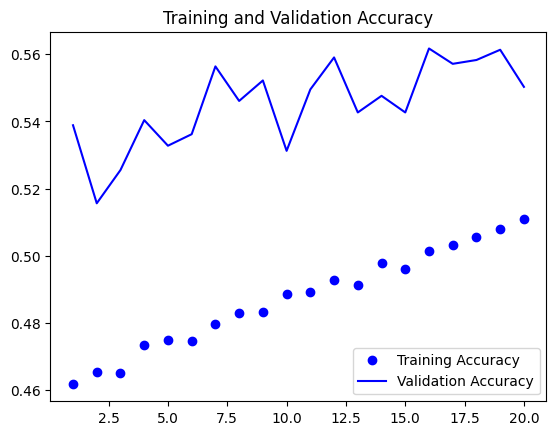

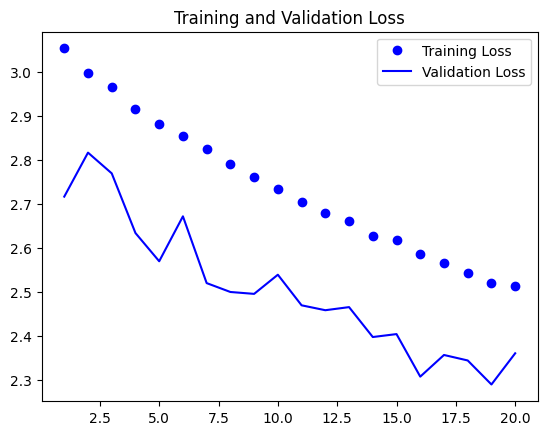

In [ ]:
acc_2 = history_2['acc']
val_acc_2 = history_2['val_acc']
loss_2 = history_2['loss']
val_loss_2 = history_2['val_loss']

epochs = range(1,len(acc_2) + 1)

plt.plot(epochs, acc_2, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_2, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_2, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_2, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

##10.   Evaluación del modelo predictivo #2

- Como se puede observar en los gráficos de pérdidas y exactitud ya no se encuentra en sobreajuste. Sin embargo, sería necesario incrementar el número de épocas de análisis o hcaer un cambio en la arquitectura de la red entrenada.
- Evaluaremos el comportamiento del modelo más afondo, con los datos de test.




In [ ]:
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
from keras import models
# leemos el modelo alamacenado
model= models.load_model('/content/gdrive/MyDrive/descargas_kaggle/Birds_Monitoring_2.h5')

In [ ]:
# evaluamos y observamos el comportamiento de todos los datos de test 
# predichos por el modelo generado
from tensorflow.keras.preprocessing.image import ImageDataGenerator
DIRECTORY_TEST = BASE_FOLDER+'/test/'
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(directory=DIRECTORY_TEST,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=1,
                                                    class_mode='categorical',
                                                    shuffle=False)
test_labels = test_generator.classes
test_class_name = list(test_generator.class_indices.keys()) # se obtiene los nombres de cada una de las clases

Found 2625 images belonging to 525 classes.


In [ ]:
# Evaluamos de manera general el loss y el acuracy en la data de test
score=model.evaluate(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2625/2625 [==============================] - 29s 8ms/step - loss: 1.9502 - acc: 0.6545
Test loss: 1.9501781463623047
Test accuracy: 0.6544761657714844


In [ ]:
test_generator.reset()   # es necesario siempre hacer un reset antes del predict
pred = model.predict(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)  
#print(test_labels)
#print(pred.argmax(axis=1))
print(test_labels[test_labels==pred.argmax(axis=1)])
print(np.array(test_class_name)[test_labels[test_labels==pred.argmax(axis=1)]])
print(classification_report(test_labels, pred.argmax(axis=1),target_names=test_class_name,zero_division=1))

2625/2625 [==============================] - 16s 6ms/step
[  2   2   3 ... 523 523 523]
['ABYSSINIAN GROUND HORNBILL' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' ... 'YELLOW HEADED BLACKBIRD'
 'YELLOW HEADED BLACKBIRD' 'YELLOW HEADED BLACKBIRD']
                               precision    recall  f1-score   support

              ABBOTTS BABBLER       1.00      0.00      0.00         5
                ABBOTTS BOOBY       0.00      0.00      0.00         5
   ABYSSINIAN GROUND HORNBILL       1.00      0.40      0.57         5
        AFRICAN CROWNED CRANE       0.67      0.80      0.73         5
       AFRICAN EMERALD CUCKOO       1.00      0.80      0.89         5
            AFRICAN FIREFINCH       0.60      0.60      0.60         5
       AFRICAN OYSTER CATCHER       0.75      0.60      0.67         5
        AFRICAN PIED HORNBILL       1.00      0.20      0.33         5
          AFRICAN PYGMY GOOSE       1.00      0.80      0.89         5
                    ALBATROSS    

# <b>Estrategia 2:</b> Red pre-entrenada
##3.   Acondicionamiento del conjunto de datos
Realizaremos un redimensionamiento de las imágenes y lotes para el poder realizar el entrenamiento de la red neuronal. Para todo esto usaremos un Generator de Imágenes.

In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import tensorflow_hub as hub

train_datagen_3 = ImageDataGenerator(rescale=1./255.)

train_generator_3 = train_datagen_3.flow_from_directory(directory=DIRECTORY,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    seed=42)

validation_generator_3 = train_datagen_3.flow_from_directory(directory=DIRECTORY_test,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    seed=42)

NameError: ignored

In [ ]:
model_3 = tf.keras.Sequential([
    conv_base, 
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,  activation="relu"),
    tf.keras.layers.Dense(256,  activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128,  activation="relu"),
    layers.Dense(525, activation='softmax', name='output_layer') 
  ])

In [ ]:
model_3.summary()